## Cookies analysis

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('cookies.xlsx')

df.head()

,Customer ID,Age,Age Group,Postcode,Gender,Favourite Cookie,Cookies bought each week
0,1001,60,60-69,2000,M,Choc chip,1
1,1002,53,50-59,2010,M,Choc chip,1
2,1003,22,20-29,2010,F,Choc chip,2
3,1004,30,30-39,2010,F,Choc chip,6
4,1005,52,50-59,2010,F,Macadamia,3


In [3]:
df.shape

(46, 7)

In [4]:
df.dtypes

Customer ID                  int64
Age                          int64
Age Group                   object
Postcode                     int64
Gender                      object
Favourite Cookie            object
Cookies bought each week     int64
dtype: object

Checking if therer is duplicate Customer ID

In [5]:
df['Customer ID'].value_counts()

1023    1
1035    1
1044    1
1043    1
1042    1
1041    1
1040    1
1039    1
1038    1
1037    1
1036    1
1034    1
1022    1
1033    1
1032    1
1031    1
1030    1
1029    1
1028    1
1027    1
1026    1
1025    1
1045    1
1046    1
1001    1
1002    1
1021    1
1020    1
1019    1
1018    1
1017    1
1016    1
1015    1
1014    1
1013    1
1012    1
1011    1
1010    1
1009    1
1008    1
1007    1
1006    1
1005    1
1004    1
1003    1
1024    1
Name: Customer ID, dtype: int64

In [6]:
df[df.Age<0  df.Age >100]

SyntaxError: invalid syntax (<ipython-input-6-8761b02bf167>, line 1)

In [ ]:
df['Age Group'].unique()

In [ ]:
df.Postcode.unique()

In [ ]:
df.Gender.unique()

In [ ]:
df['Favourite Cookie'].unique()

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
age_group = df['Age Group']
age_group.value_counts()

10-19    11
20-29    10
30-39     9
40-49     6
60-69     5
50-59     5
Name: Age Group, dtype: int64

### Age Group Count

[Text(0.5, 0, 'Age Group'), Text(0.5, 1.0, 'Age Demographics')]

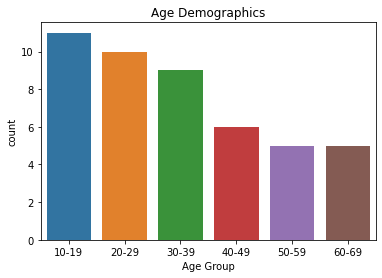

In [14]:

age_order = ["10-19","20-29",'30-39', '40-49','50-59','60-69']
sns.countplot(x=df['Age Group'], data= df,order = age_order).set(title= "Age Demographics",xlabel = 'Age Group')


In [48]:
ageg_cookie_sum= df.groupby('Age Group').aggregate({'Cookies bought each week': sum})
ageg_cookie_sum = ageg_cookie_sum.reset_index() # turn 'class' groups

ageg_cookie_sum

,Age Group,Cookies bought each week
0,10-19,64
1,20-29,37
2,30-39,30
3,40-49,19
4,50-59,18
5,60-69,15


### Number of Cookies Purchased by Age Groups

[Text(0.5, 1.0, 'Cookies Bought by Age Groups')]

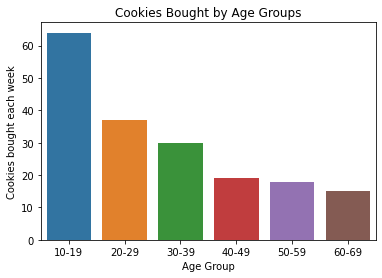

In [49]:
#Analysis which age group purchases icecreams the most 
age_order = ["10-19","20-29",'30-39', '40-49','50-59','60-69']

sns. barplot( x= 'Age Group',y=  'Cookies bought each week',data = ageg_cookie_sum,ci = 0, order= age_order).set(title = 'Cookies Bought by Age Groups')


In [46]:
#which is the most popular cookie
sum_cookie= df.groupby('Favourite Cookie').agg({'Cookies bought each week': sum})

# #flattening the groupby output
sum_cookie = sum_cookie.reset_index() # turn 'class' groups

sum_cookie


,Favourite Cookie,Cookies bought each week
0,Choc chip,58
1,Granola,27
2,Macadamia,71
3,Mint,11
4,Salted caramel,2
5,Triple choc,14


### Sales Made by Cookies in a Week 

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

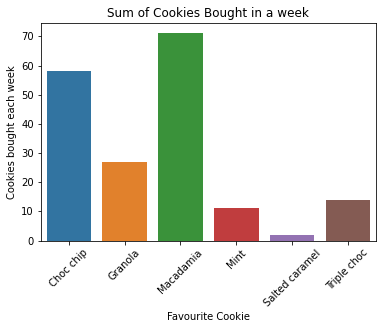

In [55]:
sns. barplot( x= 'Favourite Cookie',y = 'Cookies bought each week',data = sum_cookie,ci = 0).set(title = 'Sum of Cookies Bought in a week')
plt.xticks(rotation=45)

From the above graph we can see that Macadamia made the most no. of sales in the week

### Number of Cookies purchased by each Age Group

In [50]:
cookies_sum_byageg = df.groupby(['Age Group','Favourite Cookie']).agg({'Cookies bought each week': sum})
cookies_sum_byageg=cookies_sum_byageg.reset_index()
cookies_sum_byageg.head()

,Age Group,Favourite Cookie,Cookies bought each week
0,10-19,Choc chip,29
1,10-19,Granola,21
2,10-19,Macadamia,10
3,10-19,Mint,1
4,10-19,Salted caramel,1


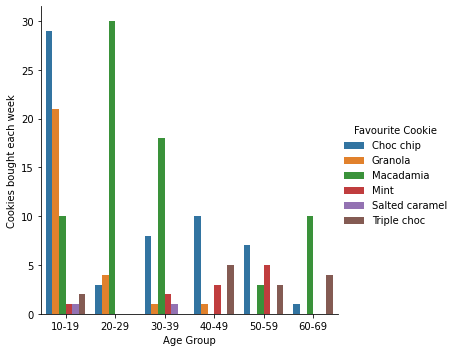

In [53]:
# No of types ofcookies purchased by each group
# Sets the figure size temporarily but has to be set again the next plot

sns.catplot(x="Age Group", y="Cookies bought each week", hue="Favourite Cookie", kind="bar", data=cookies_sum_byageg)

While age group 10-19 had made the highest number of sales for the week can see that Macadamia Cookie slightly more sales for the week which is seen to be the favourite among the age group 20-29

In [ ]:
# check corrolation between age and no. of cookies bought